In [1]:
from torchzero.optim import RandomWalk, RandomWalkSO
from image_descent import ImageDescent

image = r"F:\Stuff\Programming\AI\pytorch image descent\surfaces\spiral.jpg"

# Random walk
Makes a step in random direction, goes back if loss increases.

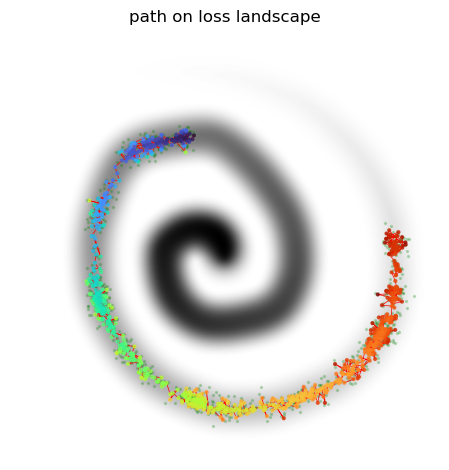

In [2]:
descent = ImageDescent(image, coords=(915, 500))

optimizer = RandomWalk(descent.parameters(), lr=2e-2, stochastic=False)
for i in range(1000):
    print(i, end='\r')
    optimizer.step(descent.step_nograd_search)
    descent.step_nograd()
descent.plot_path()

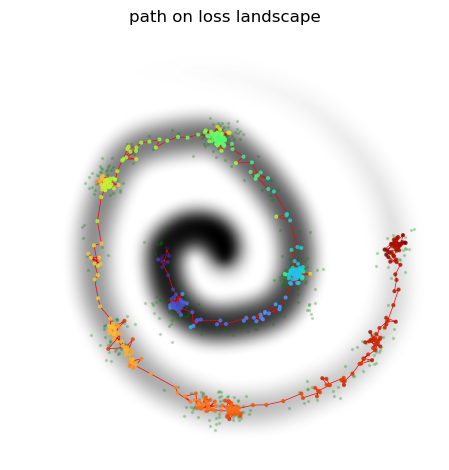

In [6]:
descent = ImageDescent(image, coords=(915, 500))

optimizer = RandomWalk(descent.parameters(), lr=2e-2, momentum=0.5, stochastic=False)
for i in range(500):
    print(i, end='\r')
    optimizer.step(descent.step_nograd_search)
    descent.step_nograd()
descent.plot_path()

# 2nd order random walk (not vanilla)
Algorithm:

1. Generate a random direction and perform a step in that direction
    - if loss increased, undo the step and go to step 1.
    - if loss decreased, save the direction.
2. Generate a random change to the saved direction and perform a step in that direction.
    - if loss decreased, save the new direction and go to step 2.
    - if loss increased, undo the step, restore the previous direction and go to step 2.
    - if loss increases retries times in a row, undo the step and go to step 1.


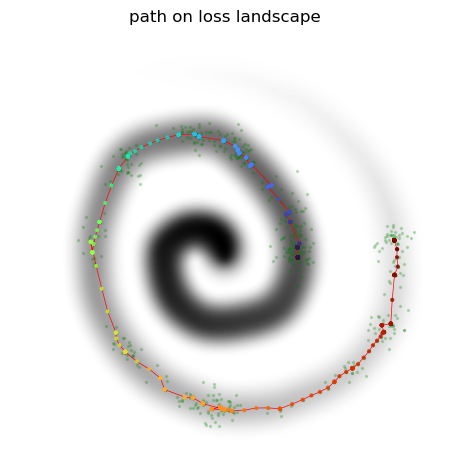

In [10]:
descent = ImageDescent(image, coords=(915, 500))

optimizer = RandomWalkSO(descent.parameters(), lr = 2e-2, lr2=3e-3)
for i in range(500):
    print(i, end='\r')
    optimizer.step(descent.step_nograd_search)
    descent.step_nograd()
descent.plot_path()

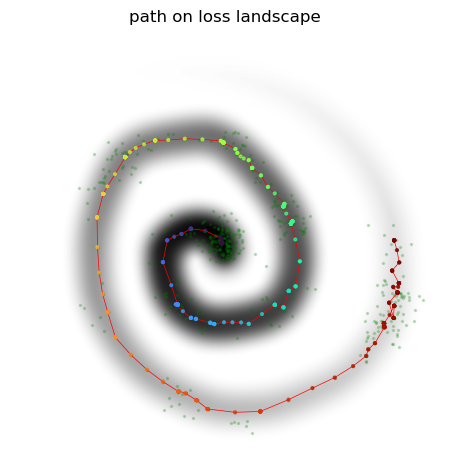

In [11]:
descent = ImageDescent(image, coords=(915, 500))

optimizer = RandomWalkSO(descent.parameters(), lr = 2e-2, lr2=3e-3, retries=1, momentum=0.5, momentum_decay=(0.95,0.8))
for i in range(500):
    print(i, end='\r')
    optimizer.step(descent.step_nograd_search)
    descent.step_nograd()
descent.plot_path()